In [17]:
import pandas as pd
import yfinance as yf
from arch import arch_model
import matplotlib.pyplot as plt

In [18]:
RISKY_ASSET = 'AMZN'
START_DATE = '2019-03-01'
END_DATE = '2022-03-01'

In [19]:
df = yf.download(RISKY_ASSET,
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True)

[*********************100%***********************]  1 of 1 completed


In [20]:
returns = 100 * df['Adj Close'].pct_change().dropna()
returns.name = 'asset_returns'

<AxesSubplot:title={'center':'AMZN returns: 2019-03-01 - 2022-03-01'}, xlabel='Date'>

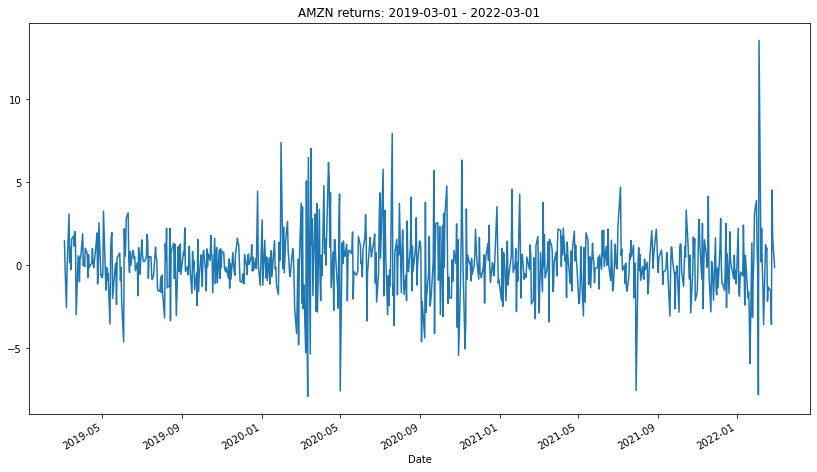

In [21]:
plt.figure(figsize=(14,8))
returns.plot(title=f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}')

In [22]:
model = arch_model(returns, mean='Zero', vol='ARCH', p=1, o=0, q=0)

In [23]:
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -1535.32
Distribution:                  Normal   AIC:                           3074.64
Method:            Maximum Likelihood   BIC:                           3083.89
                                        No. Observations:                  755
Date:                Fri, Mar 25 2022   Df Residuals:                      755
Time:                        21:53:04   Df Model:                            0
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.7557      0.283      9.751  1.833e-22 [  2.202,  3.31

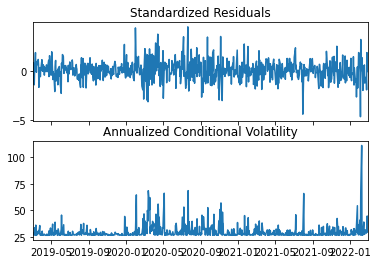

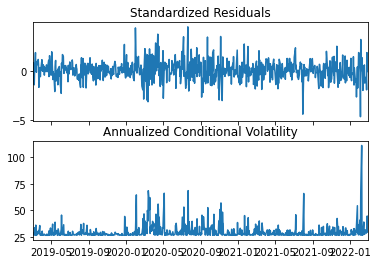

In [24]:
model_fitted.plot(annualize='D')

In [25]:
model = arch_model(returns, mean='Zero', vol='GARCH', p=1, o=0, q=1)

In [26]:
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1509.21
Distribution:                  Normal   AIC:                           3024.42
Method:            Maximum Likelihood   BIC:                           3038.30
                                        No. Observations:                  755
Date:                Fri, Mar 25 2022   Df Residuals:                      755
Time:                        21:53:54   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2045      0.151      1.358      0.175 [-9.07

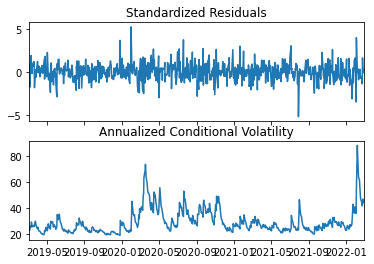

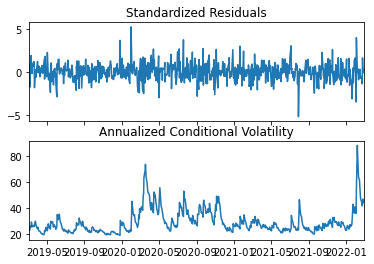

In [27]:
model_fitted.plot(annualize='D')